Coefficients: 
 [ -7.97851461e-02   2.01793919e-03   1.73515601e-02  -1.07473251e-01
   1.79310346e-02   1.02627501e-02  -2.47526798e-02   1.38612243e-02
  -2.60246347e-05  -0.00000000e+00  -9.69374743e-03  -3.64992791e-02
   3.12980550e-01  -1.66489220e-03   1.71988196e-03   0.00000000e+00]
Mean squared error: 0.09
Variance score: 0.43


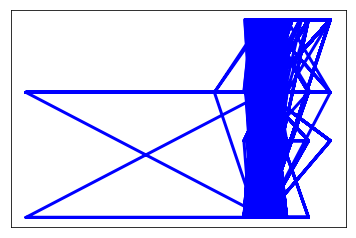

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pickle
from sklearn.externals import joblib
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
def p2f(x):
    return float(x.strip('%'))
def toStringArr(featureName):
    arr = []
    for i in range(0, len(dat2)):
        arr.append(str(dat2[i][featureName]))
    return arr
def toFloatArr(featureName):
    arr = []
    for i in range(0, len(dat2)):
        arr.append( float(dat2[i][featureName]))
    return arr

#preprocessing 
data = open('data.json').read()
dat  = json.loads(data)
datOriginal = np.array(dat)
dat2 = np.array(dat)

#y variable 
interestRate = []
for i in range(0, len(datOriginal)):
    interestRate.append(p2f(datOriginal[i]['interestRate']))

#x variables
xStr = ['firstTimeHomeBuyer', 'occupancyStatus', 'sellerName', 'servicerName', 
        'channel', 'PPM', 'propertyType', 'loanPurpose']
xFloat = ['creditScore', "numBorrowers", "numUnits", 'loanTerm', 'DTI', 'unpaidAmount', 'LTV', 'CLTV']


firstTimeHomeBuyer = toStringArr('firstTimeHomeBuyer')
OS = toStringArr(xStr[1])
SN = toStringArr(xStr[2])
SerN = toStringArr(xStr[3])
Ch = toStringArr(xStr[4])
PPM = toStringArr(xStr[5])
PT = toStringArr(xStr[6])
LP = toStringArr(xStr[7])

le = preprocessing.LabelEncoder()

fTHMBclass = le.fit(['True', 'False', 'None'])

le2 = preprocessing.LabelEncoder()

OSclass = le2.fit(['O', 'I', 'S'])
le3 = preprocessing.LabelEncoder()

sellerNclass = le3.fit(SN)
le4 = preprocessing.LabelEncoder()

servicerNclass = le4.fit(SerN) 
le5 = preprocessing.LabelEncoder()

chaclass = le5.fit(Ch)
le6 = preprocessing.LabelEncoder()

PPMclass = le6.fit(PPM)
le7 = preprocessing.LabelEncoder()

PTclass = le7.fit(PT)
le8 = preprocessing.LabelEncoder()

lpclass = le8.fit(LP)

#{Preprocess each data object in array}
dataArr = [];
for item in dat2:
    data_point_arr = [];
    for key in list(item):
        if key in xStr:
            if(key == xStr[0]):
               item[key] = fTHMBclass.transform([str(item[key])])[0]
            if(key == xStr[1]):
                item[key] = OSclass.transform([item[key]])[0]
            if(key == xStr[2]):
                item[key] = sellerNclass.transform([item[key]])[0]
            if(key== xStr[3]):
                item[key] = servicerNclass.transform([item[key]])[0]
            if(key== xStr[4]):
                item[key] = chaclass.transform([item[key]])[0]
            if(key == xStr[5]):
                item[key] = PPMclass.transform([item[key]])[0]
            if(key == xStr[6]):
                item[key] = PTclass.transform([item[key]])[0]
            if(key == xStr[7]):
                item[key] = lpclass.transform([item[key]])[0]
            data_point_arr.append(item[key])
        elif key in xFloat:
            try:
                if (item[key]==None):
                    item[key]=301.00
                    data_point_arr.append(item[key])
                else:
                    item[key] = float(item[key])
                    data_point_arr.append(item[key])
            except ValueError:
                if key =='DTI' and item[key] == '   ':
                    item[key] = 65.00
                    data_point_arr.append(item[key])
                elif key == 'DTI' and item[key] == '':
                    item[key] = 30
                    data_point_arr.append(item[key])
                else:
                    item[key] = 50.00
                    data_point_arr.append(item[key])
                
        else:
            del item[key]
    dataArr.append(np.array(data_point_arr))



xtrain = np.array(dataArr[:-25000])
xtest = np.array(dataArr[-25000:])

ytrain = np.array(interestRate[:-25000])
ytest = np.array(interestRate[-25000:])
#fit
xtrain = preprocessing.scale(xtrain)
xtest = preprocessing.scale(xtest)

linreg = linear_model.LinearRegression()
ridreg = linear_model.Ridge(alpha = .5)
rid_reg = Ridge(alpha=10)
lasso_reg = linear_model.Lasso(alpha=0.01)
random_forest_reg = RandomForestRegressor(max_depth=2, random_state=0)
elasticnet_reg = linear_model.ElasticNet(alpha=0.05, random_state=0)
# Train the model using the training sets
#simple linear regression
linreg.fit(xtrain, ytrain)
#ridge regression
rid_reg.fit(xtrain, ytrain)
#L1 based feature selection
lasso_reg.fit(xtrain, ytrain)
#Random forest feature selection
random_forest_reg.fit(xtrain, ytrain)
#elastic net feature selection
elasticnet_reg.fit(xtrain, ytrain)

joblib.dump(linreg, 'model.pkl')
joblib.dump(rid_reg, 'model1.pkl')
joblib.dump(lasso_reg, 'model2.pkl')
joblib.dump(random_forest_reg, 'model3.pkl')
joblib.dump(elasticnet_reg, 'model4.pkl')
# Make predictions using the testing set
ypred = linreg.predict(xtest)
ypred2 = rid_reg.predict(xtest)
#ridge regression
ypred3 = lasso_reg.predict(xtest)
ypred4 = random_forest_reg.predict(xtest)
ypred5 = elasticnet_reg.predict(xtest)
# The coefficients
print('Coefficients: \n', lasso_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred3))

# Plot outputs
#plt.scatter(xtest, ytest,  color='black')
plt.plot(xtest, ypred4, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

